In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
ori_AU_consistency = np.loadtxt("Data/AU_consistency.txt")
AU_consistency = 100*ori_AU_consistency/27

### Emotions boundaries with Inter-Segment Gap (ISG)

In [26]:
emotions_dict = {"Happy1":['thistle',[64,282]], "Happy2":['lavender',[341, 754]],
             "Surprise1":['mediumpurple',[816, 1164]], "Fear":['slateblue',[1232, 1352]], 
             "Disgust1":['lightgrey',[1413, 1872]], "Disgust2":['royalblue',[1934, 2454]], 
             "Sadness1":['deepskyblue',[2514, 3198]], "Sadness2":['lightsteelblue',[3264, 3932]], 
             "Surprise2":['cornflowerblue',[3993, 4831]]}

### AU consistency along the video timeline in DISFA

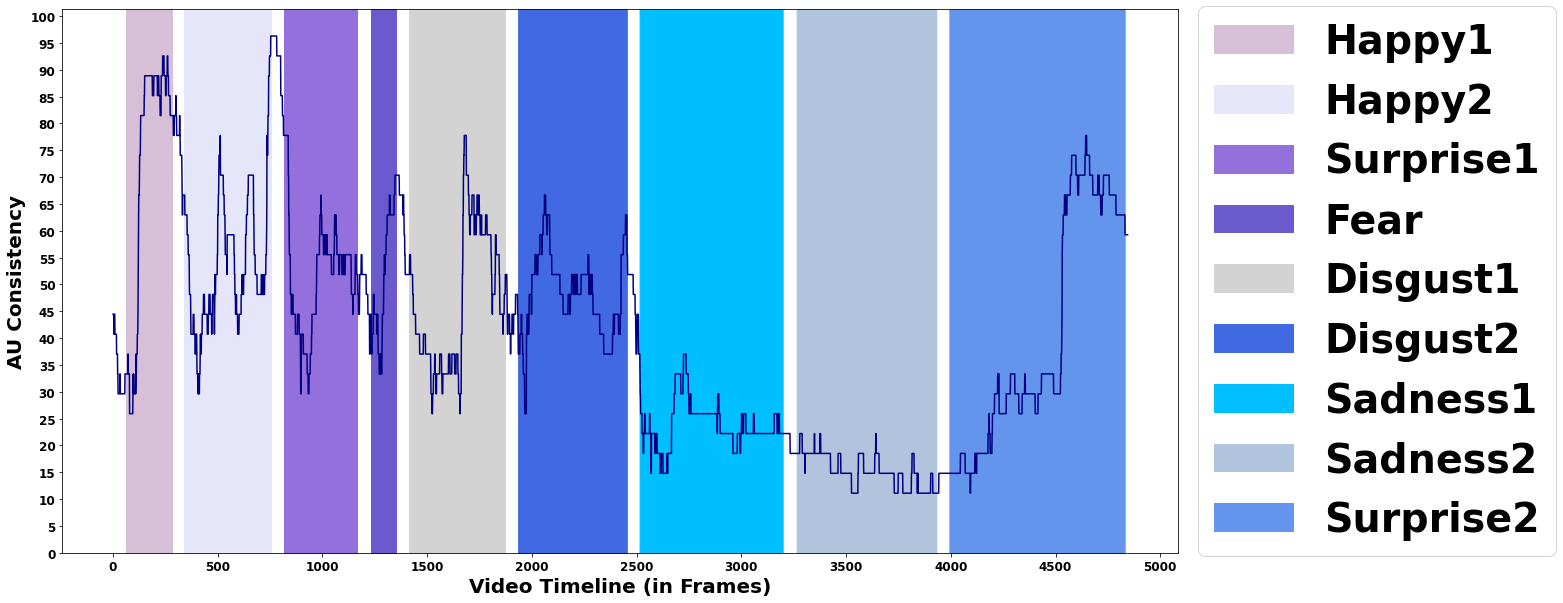

In [27]:
x = np.arange(0, AU_consistency.shape[0],1)
y = AU_consistency.copy()
fig, ax = plt.subplots(figsize=(20,10))
mx=np.amax(y)+5
# plt.figure(figsize=(20,10))
plt.xticks(np.arange(0, 5001, 500))
# plt.xticks(np.arange(0, x.shape[0], 500))
plt.yticks(np.arange(0,mx,5))
plt.ylim(0,mx)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
    label.set_fontweight('bold')
for key in emotions_dict:
    color = emotions_dict[key][0]
    emotion = key
    a, b = emotions_dict[key][1][0], emotions_dict[key][1][1] 
#     plt.fill_between(x, 0, y, np.multiply(x>=a,x<b), color=color, label=emotion)
    plt.fill_between(x, 0, mx*np.ones(y.shape[0]), np.multiply(x>=a,x<b), color=color, label=emotion)

# plt.legend(loc='upper right', prop={'weight':'bold'})
plt.ylabel('AU Consistency', fontsize=20, fontweight='bold')
plt.xlabel('Video Timeline (in Frames)', fontsize=20, fontweight='bold')
plt.plot(x,y, color='navy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight':'bold', 'size':39.5})
plt.savefig("Results/Consistency_vs_Frames.pdf", dpi=300, bbox_inches='tight')

### Extended Emotion boundaries

In [36]:
emotions_dict = {"Happy1":['thistle',[64,341]],
                 "Happy2":['lavender',[341, 816]],
                 "Surprise1":['mediumpurple',[816, 1232]],
                 "Fear":['slateblue',[1232, 1413]], 
                 "Disgust1":['lightgrey',[1413, 1934]],
                 "Disgust2":['royalblue',[1934, 2514]], 
                 "Sadness1":['deepskyblue',[2514, 3264]],
                 "Sadness2":['lightsteelblue',[3264, 3993]], 
                 "Surprise2":['cornflowerblue',[3993, 4831]]}

### CDF analysis of AU consistency

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22. 23. 24. 25. 26.]
[ 0.  0.  0.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]
[184 446 407 360 307 273 271 226 200 308 237 317 209 183 207 173 171  60
  64  56  36  86  35  29]


<Figure size 432x288 with 0 Axes>

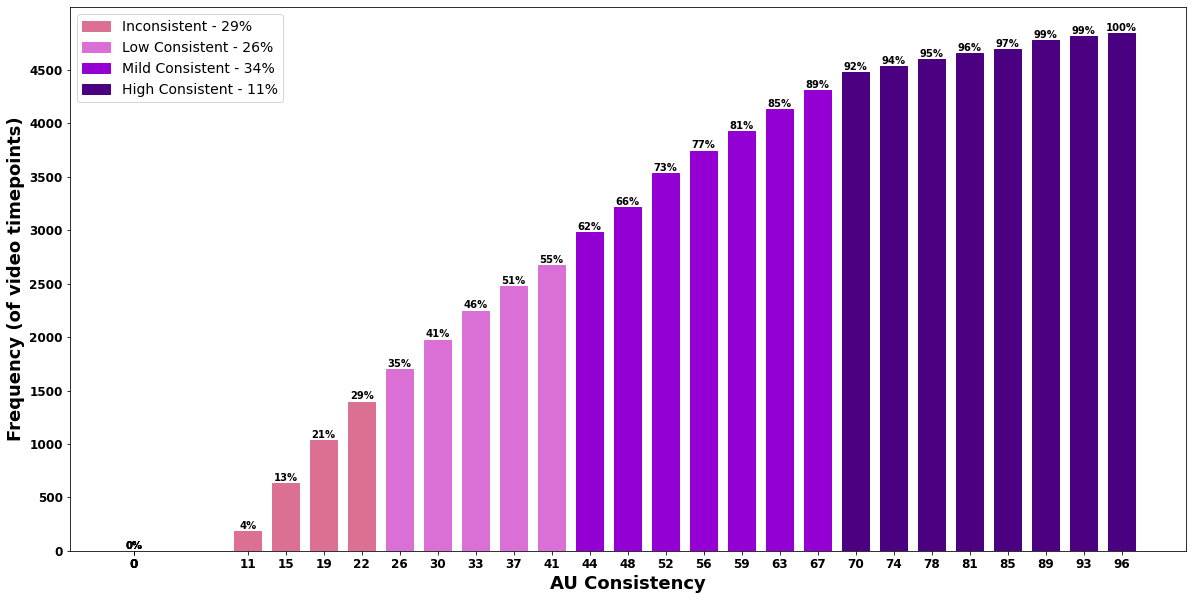

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
# data = 100*max_AU_count.copy()/27
data = ori_AU_consistency.copy()

uniqw, inverse = np.unique(data, return_inverse=True)
print(uniqw)
uniqw = np.concatenate(([0, 0, 0], uniqw))
print(uniqw)

counts_temp = np.bincount(inverse)
print(counts_temp)
counts = np.cumsum(counts_temp)
counts = np.concatenate(([0, 0, 0], counts))
# counts = counts_temp.copy()
# print(counts)
# Switching to the OO-interface. You can do all of this with "plt" as well.
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_yticks(np.arange(0, 5000, 500))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
    label.set_fontweight('bold')
ax.set_ylabel("Frequency (of video timepoints)", fontsize=18, fontweight='bold')
ax.set_xlabel("AU Consistency", fontsize=18, fontweight='bold')
ax.set(xticks=uniqw, xticklabels=[f"{round(val*100/27)}" for val in uniqw])
# ax.set(xticks=uniqw, xticklabels=[f"{val*100/27:.1f}" for val in uniqw])
pps = ax.bar(uniqw, counts, width=0.7, align='center', color='violet')

for i in range(0, 7):
    pps[i].set_color('palevioletred')
for i in range(7, 12):
    pps[i].set_color('orchid')
for i in range(12, 19):
    pps[i].set_color('darkviolet')
for i in range(19, 27):
    pps[i].set_color('indigo')

colors = {'Inconsistent - 29%': 'palevioletred', 'Low Consistent - 26%': 'orchid',
          'Mild Consistent - 34%': 'darkviolet', 'High Consistent - 11%': 'indigo'}
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
plt.legend(handles, labels, prop={'size': 14})

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 20,
            s="{:.0f}%".format(100*height/4845),
            ha='center', fontsize=10, fontweight='bold')

plt.savefig("Results/max_AU_count_cumhist.pdf", dpi=300)


In [41]:
def calculate_quartiles(arr):
    q1 = np.percentile(arr, 29)
    q2 = np.percentile(arr, 55)
    q3 = np.percentile(arr, 89)
    return q1, q2, q3

In [42]:
calculate_quartiles(AU_consistency)

(25.925925925925927, 40.74074074074074, 70.37037037037037)

In [43]:
# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=["Inconsistent", "Low Consistent", "Mild Consistent", "High Consistent"])

# Iterate through each emotion in the dictionary
for emotion, (color, index_range) in emotions_dict.items():
    start_index, end_index = index_range

    # Extract values within the specified index range
    subset = AU_consistency[start_index:end_index]

    # Calculate quartiles
    q1, q2, q3 = calculate_quartiles(AU_consistency)

    # Categorize values
    category = np.zeros_like(subset, dtype=int)
    category[subset < q1] = 1
    category[(subset >= q1) & (subset < q2)] = 2
    category[(subset >= q2) & (subset < q3)] = 3
    category[subset >= q3] = 4

    # Calculate percentages
    percentages = np.array([int(np.round(np.mean(category == i) * 100)) for i in range(1, 5)])

    # Add row to the DataFrame
    result_df.loc[emotion] = percentages
    # Add mean, max, and min for each column
print(result_df)


          Inconsistent Low Consistent Mild Consistent High Consistent
Happy1               0             19               8              74
Happy2               0              5              68              27
Surprise1            0             11              83               6
Fear                 0             12              76              12
Disgust1             0             36              59               5
Disgust2             0             13              87               0
Sadness1            62             38               0               0
Sadness2           100              0               0               0
Surprise2           24             40              20              16
